### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the dataset

In [2]:
df = pd.read_csv('C:/Intel/used_cars.csv')
print(df.shape)
df.head()

(4009, 12)


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


### Insights from the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [7]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

### Checking the null values in dataset

In [9]:
(df.isnull().sum()/len(df))*100

brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        4.240459
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         2.818658
clean_title     14.866550
price            0.000000
dtype: float64

In [10]:
df.isnull().sum().sum()

np.int64(879)

### Remove the null values

In [3]:
df.dropna(inplace=True)

In [4]:
print((df.isnull().sum()/len(df))*100)
print()
print(df.shape)

brand           0.0
model           0.0
model_year      0.0
milage          0.0
fuel_type       0.0
engine          0.0
transmission    0.0
ext_col         0.0
int_col         0.0
accident        0.0
clean_title     0.0
price           0.0
dtype: float64

(3269, 12)


### Type casting on price column

In [5]:
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True)

In [6]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3269 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3269 non-null   object
 1   model         3269 non-null   object
 2   model_year    3269 non-null   int64 
 3   milage        3269 non-null   object
 4   fuel_type     3269 non-null   object
 5   engine        3269 non-null   object
 6   transmission  3269 non-null   object
 7   ext_col       3269 non-null   object
 8   int_col       3269 non-null   object
 9   accident      3269 non-null   object
 10  clean_title   3269 non-null   object
 11  price         3269 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 332.0+ KB


In [29]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,31000
7,BMW,740 iL,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,7300


### Number of unique values in dataset

In [30]:
df.nunique()

brand             52
model           1614
model_year        34
milage          2194
fuel_type          7
engine           963
transmission      32
ext_col          120
int_col           74
accident           2
clean_title        1
price           1200
dtype: int64

In [10]:
df.milage.unique()

array(['51,000 mi.', '34,742 mi.', '88,900 mi.', ..., '32,250 mi.',
       '53,705 mi.', '714 mi.'], dtype=object)

In [13]:
df['milage'] = df['milage'].replace({'mi.': '', ',': ''}, regex=True)

df['milage'] = pd.to_numeric(df['milage'], errors='coerce')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3269 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3269 non-null   object
 1   model         3269 non-null   object
 2   model_year    3269 non-null   int64 
 3   milage        3269 non-null   int64 
 4   fuel_type     3269 non-null   object
 5   engine        3269 non-null   object
 6   transmission  3269 non-null   object
 7   ext_col       3269 non-null   object
 8   int_col       3269 non-null   object
 9   accident      3269 non-null   object
 10  clean_title   3269 non-null   object
 11  price         3269 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 332.0+ KB


In [15]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,31000
7,BMW,740 iL,2001,242000,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,7300


### Checking the skewness of numerical features

In [17]:
from scipy import stats

In [19]:
num_col = df.select_dtypes(include='number')
num_col.head()

,model_year,milage,price
0,2013,51000,10300
1,2021,34742,38005
3,2015,88900,15500
6,2017,84000,31000
7,2001,242000,7300


Skewness of model_year: -0.947306756103238


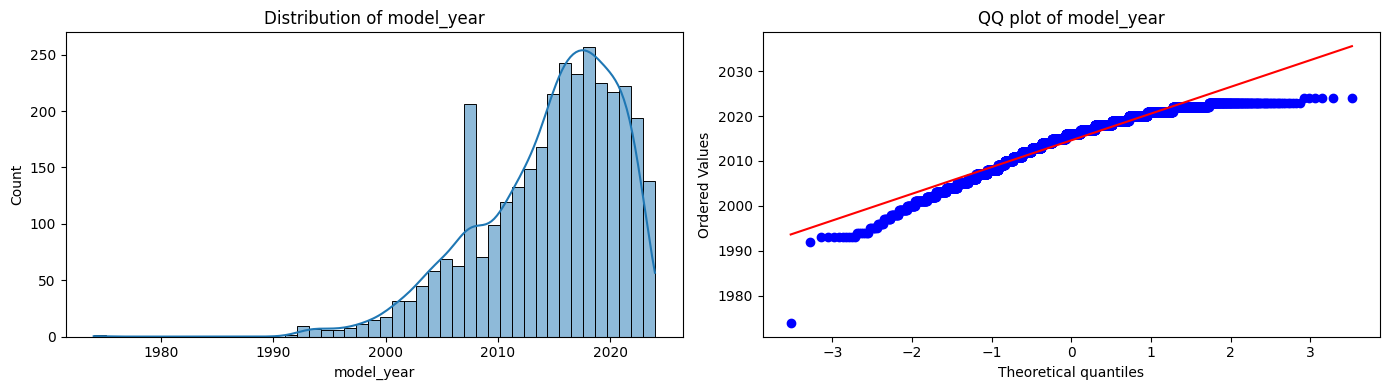

Skewness of milage: 1.0261326325632998


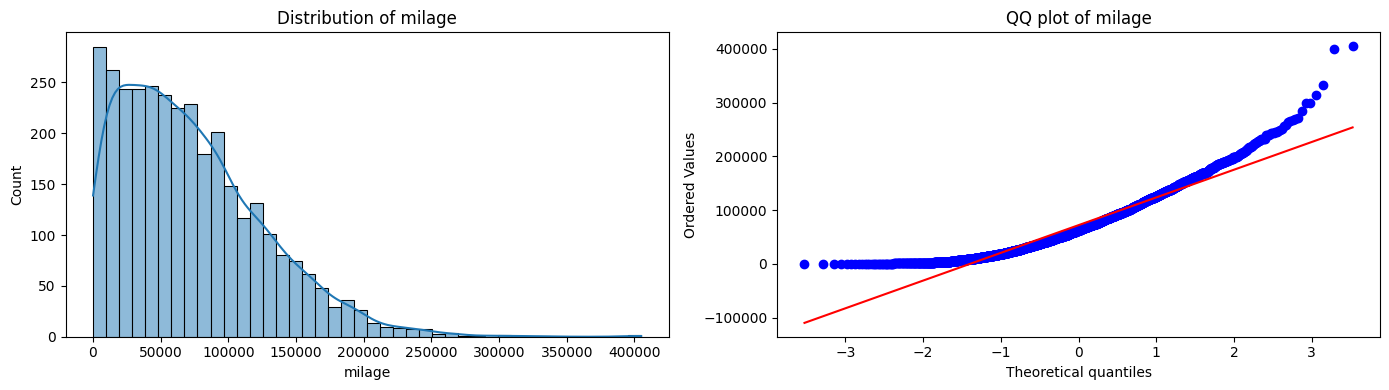

Skewness of price: 20.245614368495396


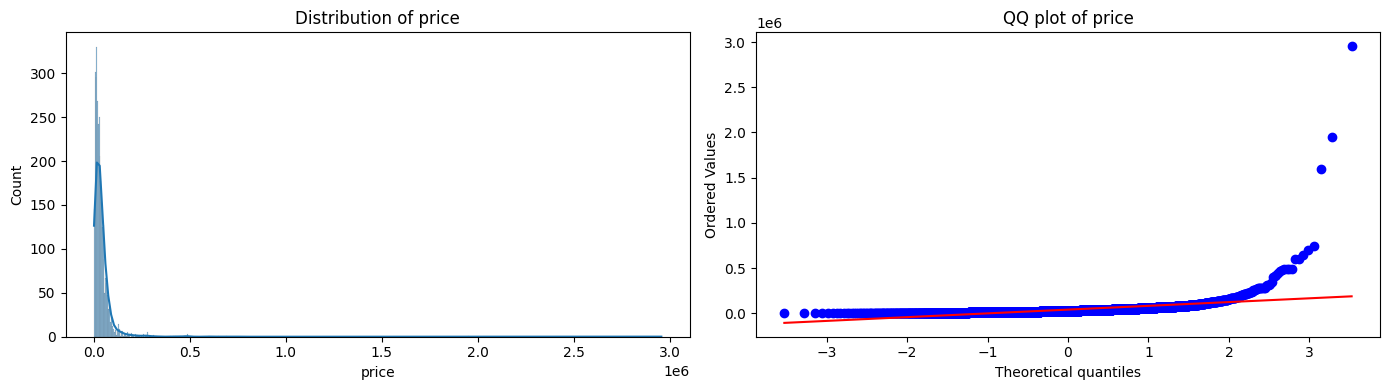

In [20]:
for col in num_col.columns:
    skewness = num_col[col].skew()
    print(f'Skewness of {col}: {skewness}')
    
    plt.figure(figsize=(14, 4))

    # Distribution plot
    plt.subplot(121)
    sns.histplot(num_col[col], kde=True)  # Changed to histplot
    plt.title(f'Distribution of {col}')

    # QQ plot
    plt.subplot(122)
    stats.probplot(num_col[col], dist='norm', plot=plt)
    plt.title(f'QQ plot of {col}')

    plt.tight_layout()
    plt.show()

### Outliers detection and removing

<Axes: ylabel='price'>

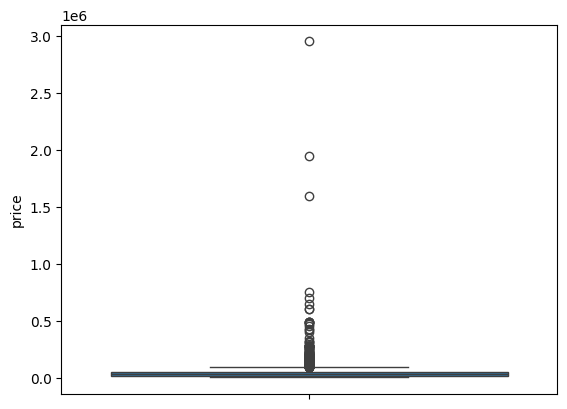

In [22]:
sns.boxplot(df['price'])

In [23]:
# finding the IQR
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['price'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['price'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

15500.0
46500.0
IQR is  31000.0
upper limit  93000.0
lower limit  -31000.0
length of outliers on upper bound  185
length of outliers on lower bound  0


(3083, 12)


<Axes: ylabel='price'>

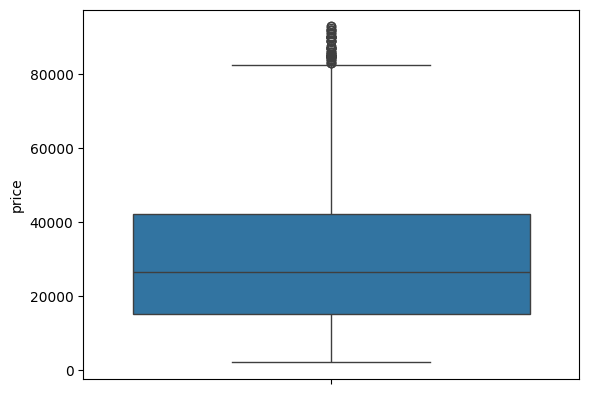

In [25]:
new_df = df[df['price'] < upper_limit]
print(new_df.shape)
sns.boxplot(new_df['price'])

In [26]:
# finding the IQR
q1 = new_df['price'].quantile(0.25)
q3 = new_df['price'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['price'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['price'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

15000.0
42000.0
IQR is  27000.0
upper limit  82500.0
lower limit  -25500.0
length of outliers on upper bound  62
length of outliers on lower bound  0


(3019, 12)


<Axes: ylabel='price'>

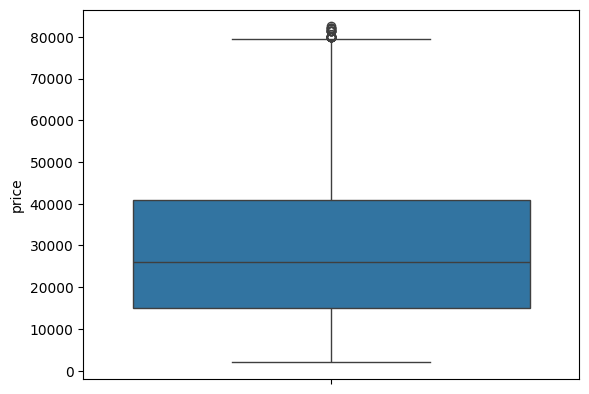

In [28]:
df = new_df[new_df['price'] < upper_limit]
print(df.shape)
sns.boxplot(df['price'])

In [29]:
# finding the IQR
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['price'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['price'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

14987.5
40919.0
IQR is  25931.5
upper limit  79816.25
lower limit  -23909.75
length of outliers on upper bound  22
length of outliers on lower bound  0


<Axes: ylabel='price'>

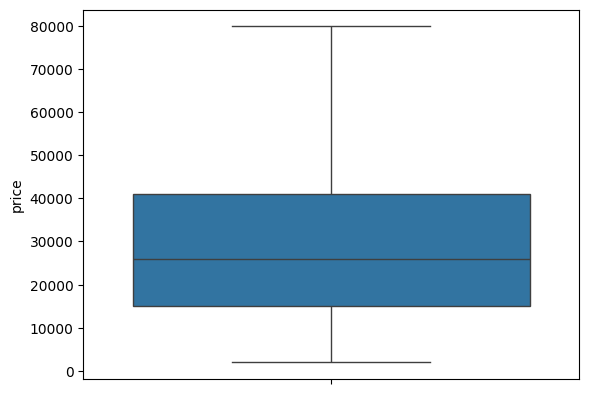

In [30]:
df['price'] = df['price'].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)

# Plot the capped data
sns.boxplot(df['price'])

#### On the milage column

<Axes: ylabel='milage'>

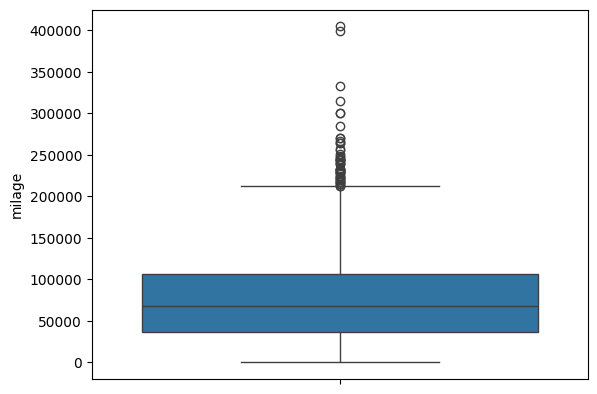

In [32]:
sns.boxplot(df['milage'])

In [33]:
# finding the IQR
q1 = df['milage'].quantile(0.25)
q3 = df['milage'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['milage'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['milage'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

36725.0
107000.0
IQR is  70275.0
upper limit  212412.5
lower limit  -68687.5
length of outliers on upper bound  50
length of outliers on lower bound  0


(2969, 12)


<Axes: ylabel='milage'>

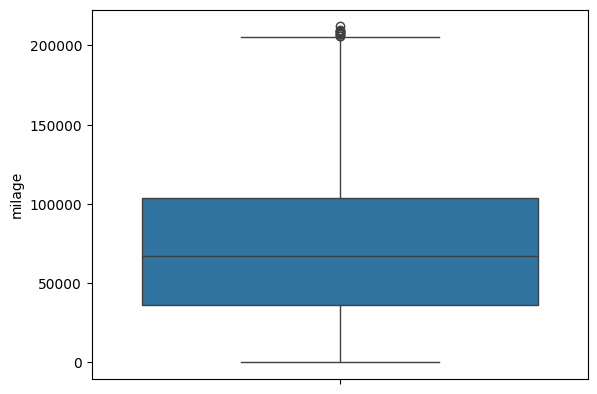

In [35]:
new_df = df[df['milage'] < upper_limit]
print(new_df.shape)
sns.boxplot(new_df['milage'])

In [36]:
# finding the IQR
q1 = new_df['milage'].quantile(0.25)
q3 = new_df['milage'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['milage'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['milage'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

36500.0
104000.0
IQR is  67500.0
upper limit  205250.0
lower limit  -64750.0
length of outliers on upper bound  10
length of outliers on lower bound  0


(2959, 12)


<Axes: ylabel='milage'>

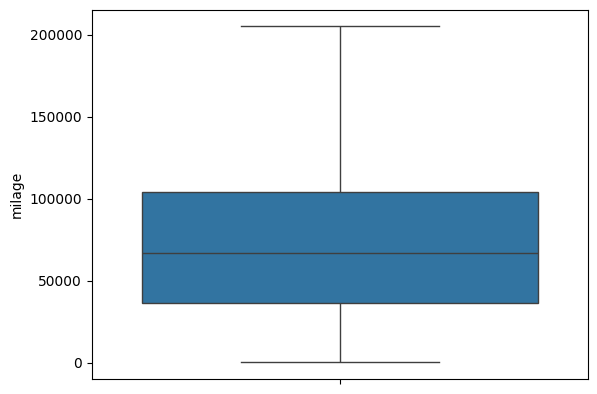

In [37]:
df = new_df[new_df['milage'] < upper_limit]
print(df.shape)
sns.boxplot(df['milage'])

### On the model_year column

<Axes: ylabel='model_year'>

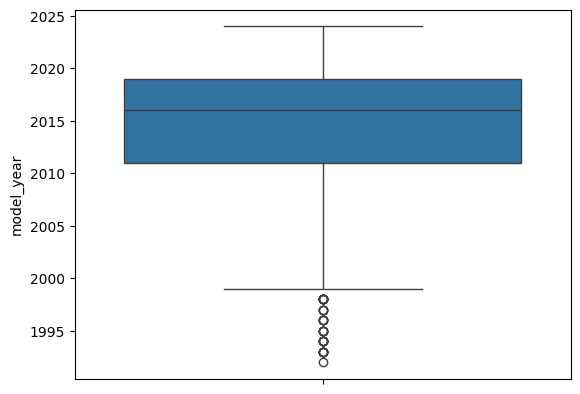

In [39]:
sns.boxplot(df['model_year'])

In [40]:
# finding the IQR
q1 = df['model_year'].quantile(0.25)
q3 = df['model_year'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['model_year'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['model_year'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

2011.0
2019.0
IQR is  8.0
upper limit  2031.0
lower limit  1999.0
length of outliers on upper bound  0
length of outliers on lower bound  40


(2906, 12)


<Axes: ylabel='model_year'>

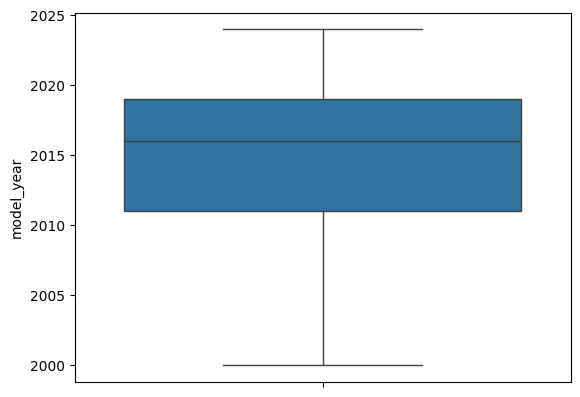

In [41]:
new_df = df[df['model_year'] > lower_limit]
print(new_df.shape)
sns.boxplot(new_df['model_year'])

<Axes: >

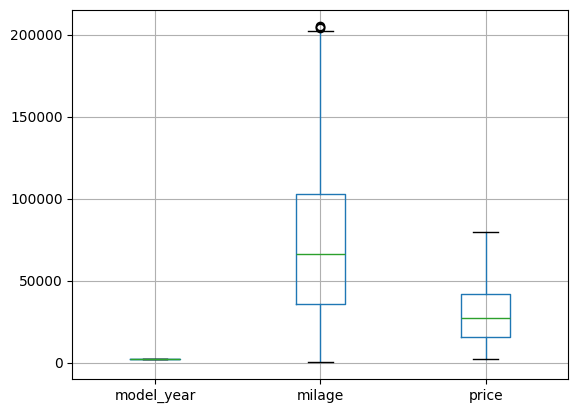

In [42]:
new_df.boxplot()

### Again on the milage column

In [70]:
# finding the IQR
q1 = new_df['milage'].quantile(0.25)
q3 = new_df['milage'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['milage'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['milage'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

35957.25
103000.0
IQR is  67042.75
upper limit  203564.125
lower limit  -64606.875
length of outliers on upper bound  3
length of outliers on lower bound  0


(2903, 12)


<Axes: ylabel='milage'>

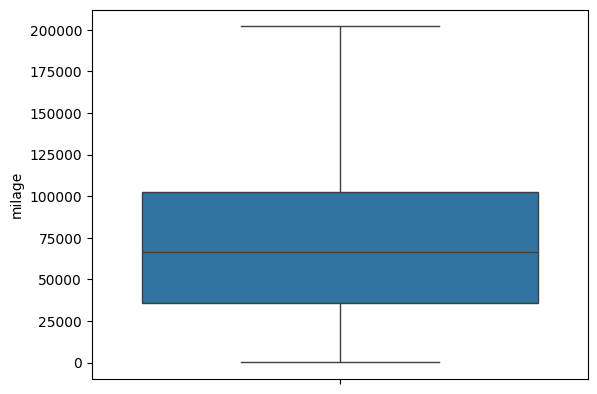

In [71]:
df = new_df[new_df['milage'] < upper_limit]
print(df.shape)
sns.boxplot(df['milage'])

<Axes: >

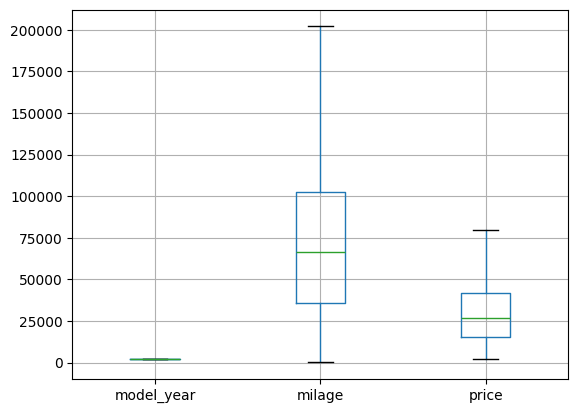

In [72]:
df.boxplot()

## File

In [73]:
df.to_csv('Newf ile.csv',index=True)

In [3]:
df = pd.read_csv('Newf ile.csv')

In [4]:
df.shape

(2903, 13)

In [5]:
df.head()

,Unnamed: 0,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
3,6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,31000.0
4,8,Lexus,RC 350 F Sport,2021,23436,Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,41927.0


In [48]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [50]:
num_col = df.select_dtypes(include='number')
cat_col = df.select_dtypes(include='object')

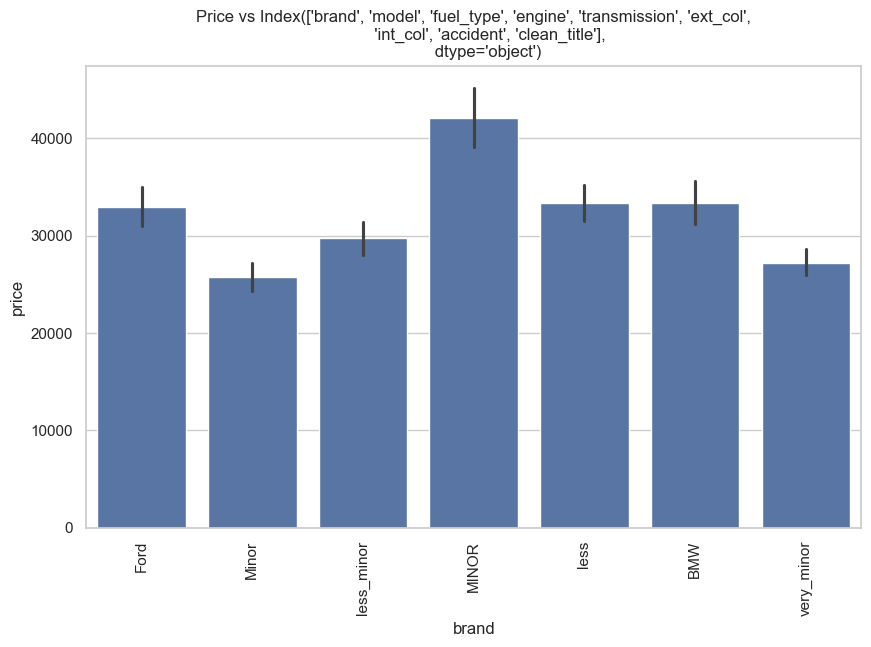

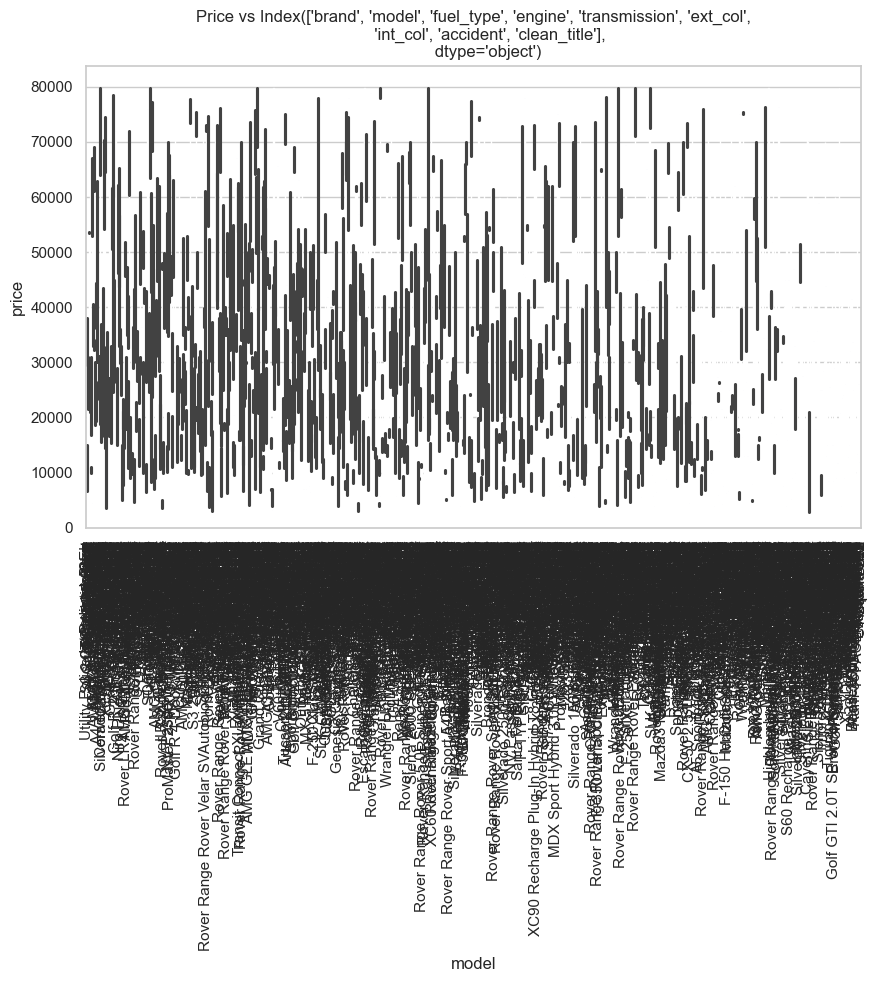

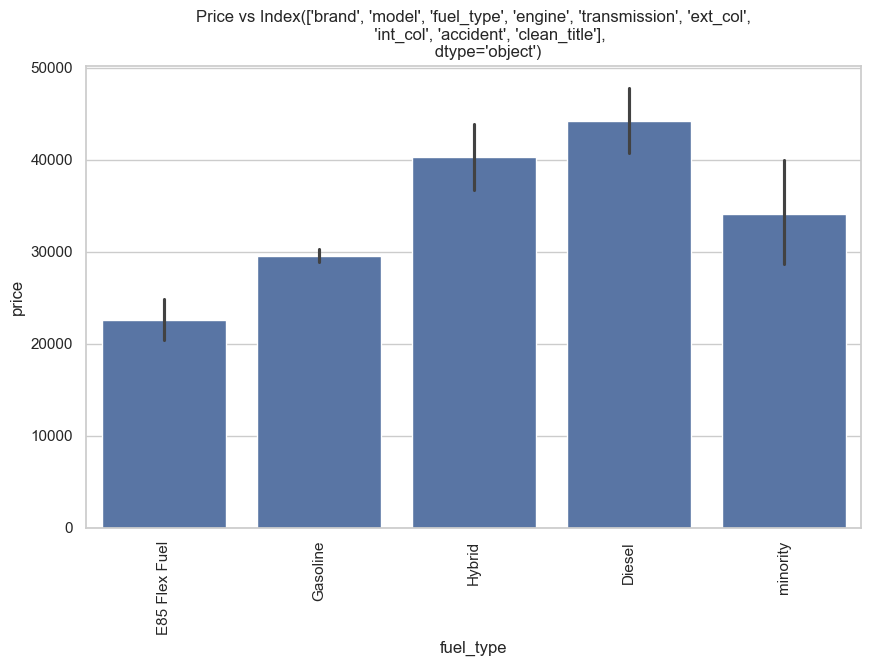

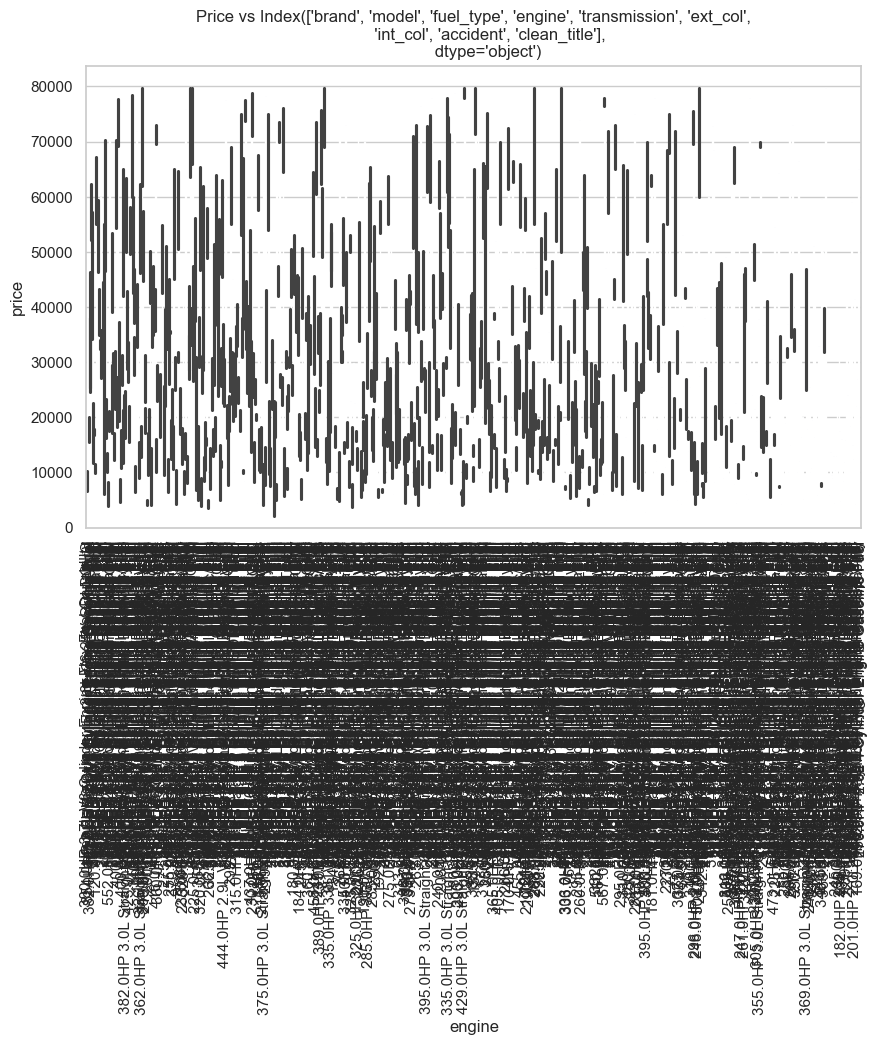

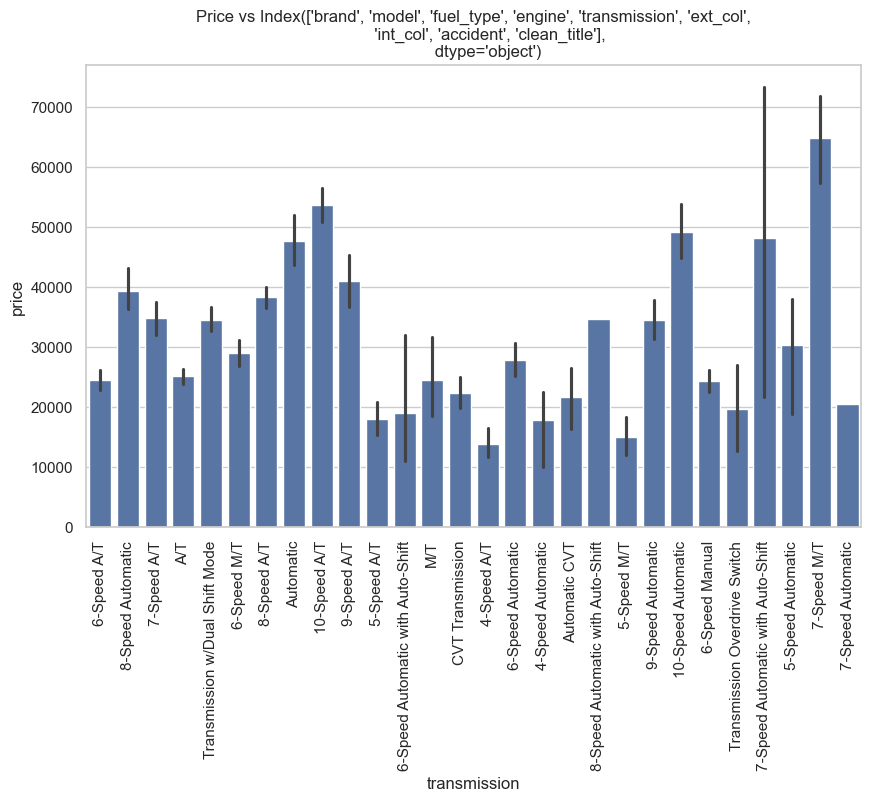

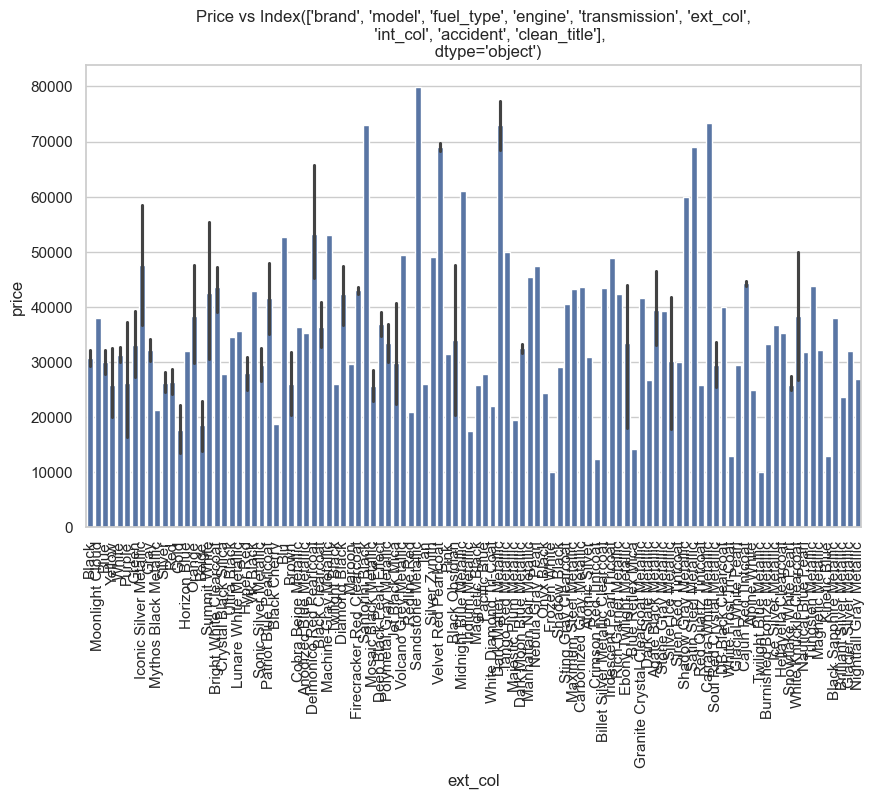

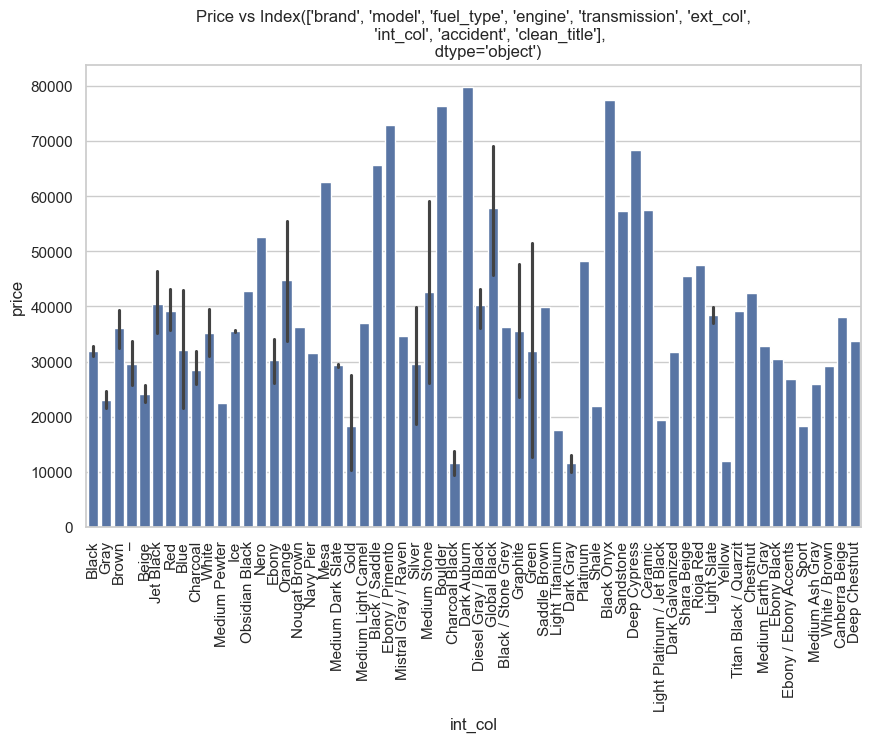

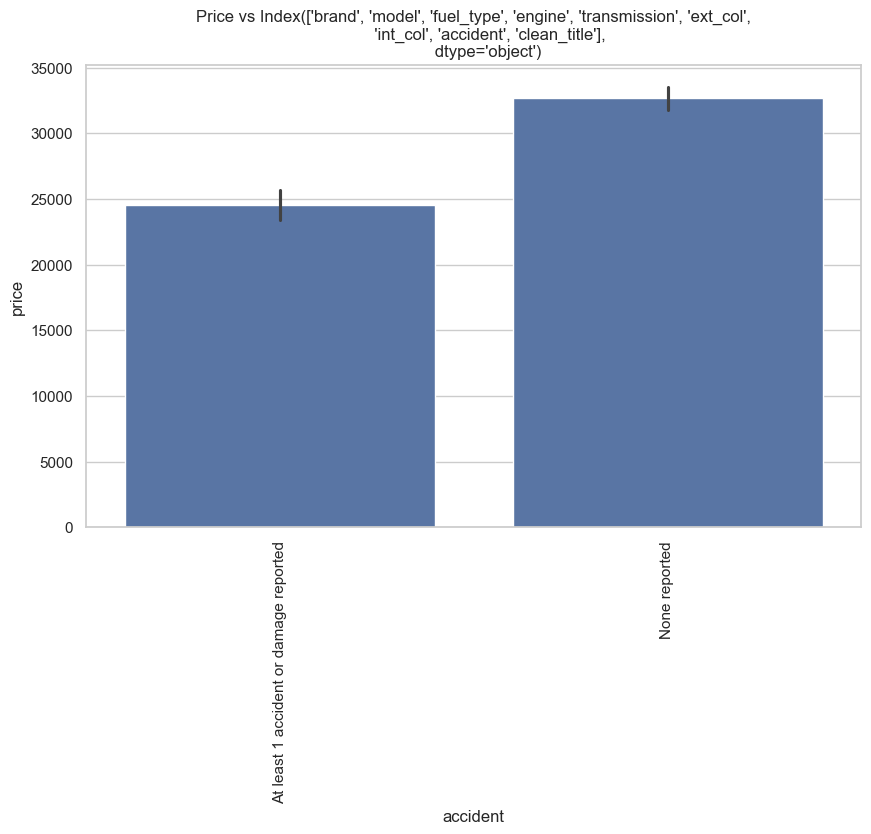

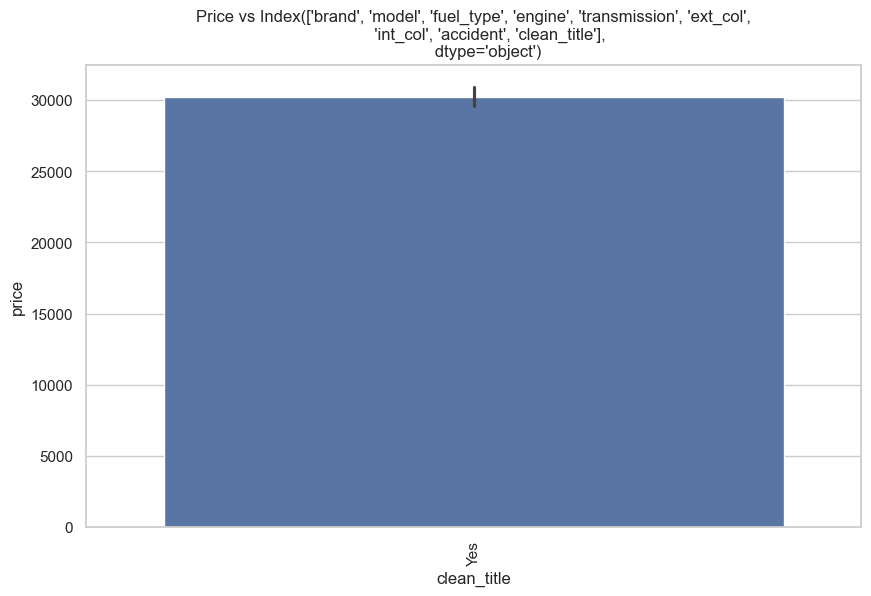

In [52]:
# Set plot style
sns.set(style="whitegrid")

# Plotting categorical features against price using boxplots
for feature in cat_col.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='price', data=df)
    plt.title(f'Price vs {cat_col.columns}')
    plt.xticks(rotation=90)
    plt.show()

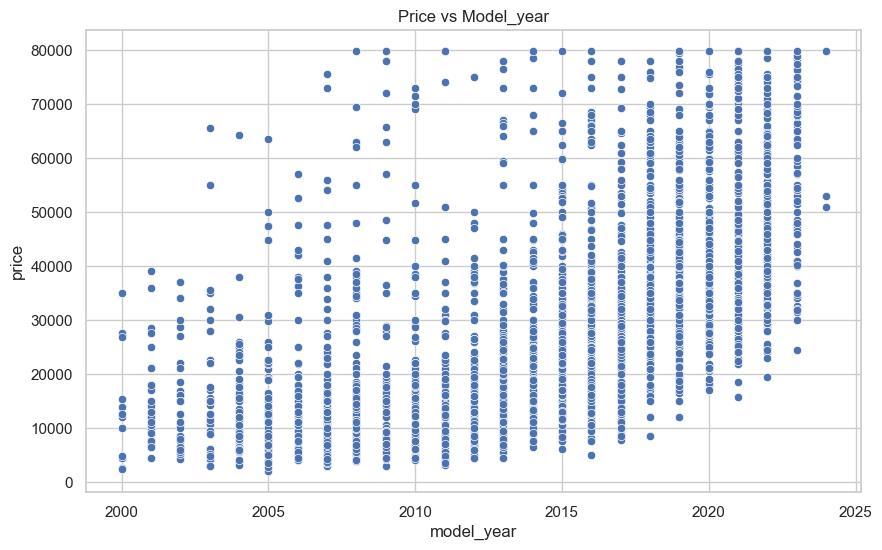

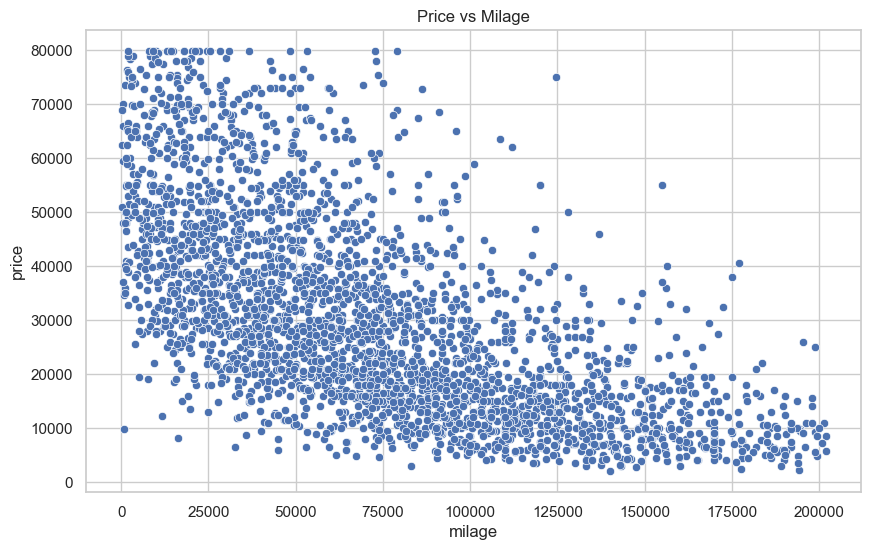

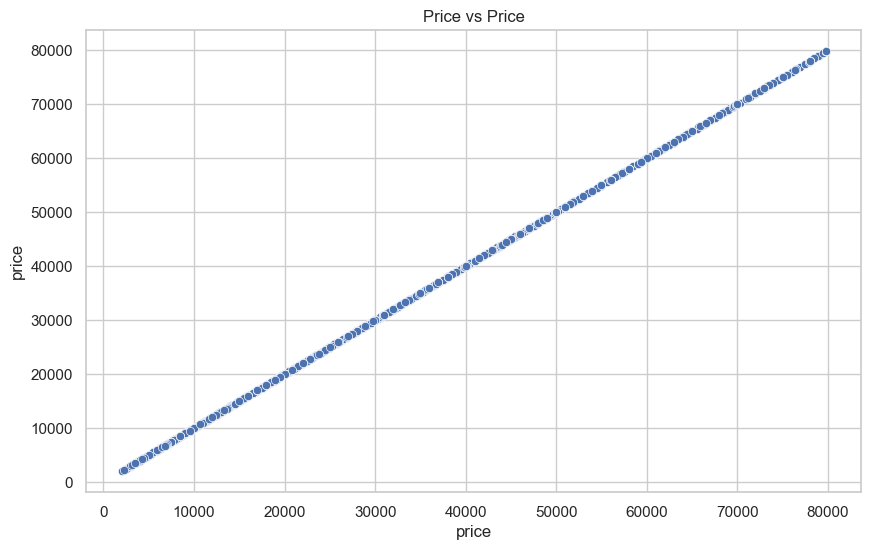

In [53]:
for feature in num_col.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='price', data=df)
    plt.title(f'Price vs {feature.capitalize()}')
    plt.show()

In [49]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

### Applying encoding techniques 

In [54]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [55]:
df.fuel_type.value_counts(True)

fuel_type
Gasoline         0.867723
E85 Flex Fuel    0.042370
Hybrid           0.042025
Diesel           0.030658
minority         0.017224
Name: proportion, dtype: float64

In [8]:
df['fuel_type'] = df['fuel_type'].replace(['Plug-In Hybrid','–','not supported'],'minority')

In [56]:
df.fuel_type.value_counts(True)

fuel_type
Gasoline         0.867723
E85 Flex Fuel    0.042370
Hybrid           0.042025
Diesel           0.030658
minority         0.017224
Name: proportion, dtype: float64

In [57]:
df.brand.value_counts(True)

brand
very_minor    0.226662
Minor         0.215295
less          0.155357
less_minor    0.144333
Ford          0.107475
BMW           0.099897
MINOR         0.050982
Name: proportion, dtype: float64

In [ ]:
df['brand'] = df['brand'].replace(['Volvo', 'Cadillac',
    'Maserati', 'Genesis', 'Volkswagen', 'GMC', 'RAM', 'Subaru',
    'Alfa', 'Scion', 'Mitsubishi', 'Mazda', 'Saturn', 'Honda', 'Buick',
    'Aston', 'Lotus', 'Rolls-Royce', 'FIAT', 'Saab', 'Mercury',
    'Pontiac', 'Plymouth', 'smart', 'Maybach', 'Suzuki','Chrysler','Hummer','Bentley'],'very_minor')

In [32]:

df['brand'] = df['brand'].replace(['MINI','Land', 'Dodge', 'Nissan','Hyundai','Kia','INFINITI','Jaguar'
'Porsche', 'Acura','Jeep','Lincoln',],'Minor')

In [25]:
df['brand'] = df['brand'].replace(['Audi', 'Lexus', 'Toyota'],'less_minor')

In [29]:
df['brand'] = df['brand'].replace(['Chevrolet',
    'Mercedes-Benz'],'less')

In [34]:
df['brand'] = df['brand'].replace(['Porsche','Jaguar'],'MINOR')

In [35]:
df.brand.unique()

array(['Ford', 'Minor', 'less_minor', 'MINOR', 'less', 'BMW',
       'very_minor'], dtype=object)

In [36]:
df.brand.value_counts(True)

brand
very_minor    0.226662
Minor         0.215295
less          0.155357
less_minor    0.144333
Ford          0.107475
BMW           0.099897
MINOR         0.050982
Name: proportion, dtype: float64

In [38]:
df.model.unique()

array(['Utility Police Interceptor Base', 'Palisade SEL',
       'Q50 Hybrid Sport', ..., 'X3 xDrive28i', 'CT 200h Base',
       'Impala 2LZ'], dtype=object)

In [41]:
df.ext_col.value_counts(True)

ext_col
Black                                 0.247330
White                                 0.222184
Gray                                  0.134688
Silver                                0.107475
Blue                                  0.097141
Red                                   0.067861
Green                                 0.015501
Brown                                 0.013779
Gold                                  0.012745
Beige                                 0.011712
Orange                                0.009645
Yellow                                0.008612
Purple                                0.003100
Summit White                          0.002756
Bright White Clearcoat                0.002411
Diamond Black                         0.002067
Black Clearcoat                       0.001378
Delmonico Red Pearlcoat               0.001033
Ebony Twilight Metallic               0.001033
Soul Red Crystal Metallic             0.001033
Snowflake White Pearl                 0.001033
Agate

In [42]:
df.ext_col.unique()

array(['Black', 'Moonlight Cloud', 'Blue', 'Yellow', 'White', 'Purple',
       'Green', 'Iconic Silver Metallic', 'Gray', 'Mythos Black Metallic',
       'Silver', 'Red', 'Gold', 'Horizon Blue', 'Orange', 'Beige',
       'Summit White', 'Bright White Clearcoat', 'Crystal Black Silica',
       'Ultra Black', 'Lunare White Metallic', 'Hyper Red', 'Vik Black',
       'Sonic Silver Metallic', 'Patriot Blue Pearlcoat', 'Black Cherry',
       'Blu', 'Brown', 'Cobra Beige Metallic', 'Anodized Blue Metallic',
       'Delmonico Red Pearlcoat', 'Black Clearcoat',
       'Machine Gray Metallic', 'Twilight Black', 'Diamond Black',
       'Maroon', 'Firecracker Red Clearcoat', 'Santorini Black',
       'Mosaic Black Metallic', 'Deep Black Pearl Effect',
       'Polymetal Gray Metallic', 'Jet Black Mica',
       'Volcano Grey Metallic', 'Redline Red', 'Sandstone Metallic',
       'Tan', 'Silver Zynith', 'Velvet Red Pearlcoat', 'Pink',
       'Black Obsidian', 'Midnight Blue Metallic', 'Iridium Metal

In [45]:
df.int_col.value_counts(True)

int_col
Black                         0.523596
Beige                         0.153634
Gray                          0.131244
Brown                         0.045470
Red                           0.033069
–                             0.029280
White                         0.025146
Jet Black                     0.009990
Ebony                         0.006545
Blue                          0.006200
Orange                        0.005167
Silver                        0.004134
Gold                          0.002756
Diesel Gray / Black           0.001722
Green                         0.001722
Global Black                  0.001378
Charcoal Black                0.001378
Charcoal                      0.001033
Medium Dark Slate             0.000689
Ice                           0.000689
Medium Stone                  0.000689
Light Slate                   0.000689
Dark Gray                     0.000689
Graphite                      0.000689
Mesa                          0.000344
Medium Pewter    

In [44]:
df.int_col.unique()

array(['Black', 'Gray', 'Brown', '–', 'Beige', 'Jet Black', 'Red', 'Blue',
       'Charcoal', 'White', 'Medium Pewter', 'Ice', 'Obsidian Black',
       'Nero', 'Ebony', 'Orange', 'Nougat Brown', 'Navy Pier', 'Mesa',
       'Medium Dark Slate', 'Gold', 'Medium Light Camel',
       'Black / Saddle', 'Ebony / Pimento', 'Mistral Gray / Raven',
       'Silver', 'Medium Stone', 'Boulder', 'Charcoal Black',
       'Dark Auburn', 'Diesel Gray / Black', 'Global Black',
       'Black / Stone Grey', 'Graphite', 'Green', 'Saddle Brown',
       'Light Titanium', 'Dark Gray', 'Platinum', 'Shale', 'Black Onyx',
       'Sandstone', 'Deep Cypress', 'Ceramic',
       'Light Platinum / Jet Black', 'Dark Galvanized', 'Shara Beige',
       'Rioja Red', 'Light Slate', 'Yellow', 'Titan Black / Quarzit',
       'Chestnut', 'Medium Earth Gray', 'Ebony Black',
       'Ebony / Ebony Accents', 'Sport', 'Medium Ash Gray',
       'White / Brown', 'Canberra Beige', 'Deep Chestnut'], dtype=object)

In [46]:
df.accident.value_counts(True)

accident
None reported                             0.698243
At least 1 accident or damage reported    0.301757
Name: proportion, dtype: float64

In [47]:
df.clean_title.value_counts(True)

clean_title
Yes    1.0
Name: proportion, dtype: float64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903 entries, 0 to 2902
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2903 non-null   int64  
 1   brand         2903 non-null   object 
 2   model         2903 non-null   object 
 3   model_year    2903 non-null   int64  
 4   milage        2903 non-null   int64  
 5   fuel_type     2903 non-null   object 
 6   engine        2903 non-null   object 
 7   transmission  2903 non-null   object 
 8   ext_col       2903 non-null   object 
 9   int_col       2903 non-null   object 
 10  accident      2903 non-null   object 
 11  clean_title   2903 non-null   object 
 12  price         2903 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 295.0+ KB


In [58]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [60]:
df.drop(columns=['transmission','ext_col','int_col','model','engine'],inplace=True)

In [61]:
df.shape

(2903, 7)

In [65]:
df['accident'] = df['accident'].replace(["At least 1 accident or damage reported"], "reported")


In [67]:
df['accident'] = df['accident'].replace(['None reported'],'not_reported')

In [68]:
df.head()

,brand,model_year,milage,fuel_type,accident,clean_title,price
0,Ford,2013,51000,E85 Flex Fuel,reported,Yes,10300.0
1,Minor,2021,34742,Gasoline,reported,Yes,38005.0
2,Minor,2015,88900,Hybrid,not_reported,Yes,15500.0
3,less_minor,2017,84000,Gasoline,not_reported,Yes,31000.0
4,less_minor,2021,23436,Gasoline,not_reported,Yes,41927.0


In [70]:
df.fuel_type.value_counts(True)

fuel_type
Gasoline         0.867723
E85 Flex Fuel    0.042370
Hybrid           0.042025
Diesel           0.030658
minority         0.017224
Name: proportion, dtype: float64

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Columns to one-hot encode
columns_to_encode = ['brand','fuel_type','accident']

# Apply OneHotEncoder using ColumnTransformer
trf1 = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), columns_to_encode)
], remainder='passthrough')

# Fit and transform the dataset (excluding the 'education' and 'y' columns for now)
encoded_array = trf1.fit_transform(df.drop(columns=['clean_title']))

# Apply LabelEncoder separately on the 'y' and 'education' columns
le_y = LabelEncoder()
df['clean_title'] = le_y.fit_transform(df['clean_title'])


# Convert the transformed array into a DataFrame (convert sparse matrix to dense if necessary)
encoded_df = pd.DataFrame(encoded_array, columns=trf1.get_feature_names_out())

# Add the LabelEncoded 'y' and 'education' columns back to the DataFrame
encoded_df['clean_title'] = df['clean_title']





# To view the label encoding mapping for 'y'
y_mapping = dict(zip(le_y.classes_, le_y.transform(le_y.classes_)))
print("LabelEncoder mapping for 'clean_title':", y_mapping)




LabelEncoder mapping for 'clean_title': {'Yes': np.int64(0)}


In [72]:
encoded_df.head()

,ohe__brand_BMW,ohe__brand_Ford,ohe__brand_MINOR,ohe__brand_Minor,ohe__brand_less,ohe__brand_less_minor,ohe__brand_very_minor,ohe__fuel_type_Diesel,ohe__fuel_type_E85 Flex Fuel,ohe__fuel_type_Gasoline,ohe__fuel_type_Hybrid,ohe__fuel_type_minority,ohe__accident_not_reported,ohe__accident_reported,remainder__model_year,remainder__milage,remainder__price,clean_title
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2013.0,51000.0,10300.0,0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2021.0,34742.0,38005.0,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2015.0,88900.0,15500.0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2017.0,84000.0,31000.0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2021.0,23436.0,41927.0,0


In [73]:
# Replace 'remainder__', 'ohe__', and 'ore__' prefixes with an empty string
encoded_df.columns = encoded_df.columns.str.replace('remainder__', '', regex=False)
encoded_df.columns = encoded_df.columns.str.replace('ohe__', '', regex=False)


In [74]:
encoded_df.head()

,brand_BMW,brand_Ford,brand_MINOR,brand_Minor,brand_less,brand_less_minor,brand_very_minor,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_minority,accident_not_reported,accident_reported,model_year,milage,price,clean_title
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2013.0,51000.0,10300.0,0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2021.0,34742.0,38005.0,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2015.0,88900.0,15500.0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2017.0,84000.0,31000.0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2021.0,23436.0,41927.0,0


In [75]:
import pandas as pd
import plotly.express as px

# Calculate the correlation matrix
corr_matrix = encoded_df.corr()

# Create a heatmap using Plotly Express
fig = px.imshow(corr_matrix,
                labels=dict(x="Features", y="Features", color="Correlation"),
                color_continuous_scale=px.colors.diverging.Tealrose,
                zmin=-1, zmax=1,
                title="Correlation Matrix of Numerical Features")

# Update layout for better appearance
fig.update_layout(
    title_font=dict(size=18, family='Arial', color='darkblue'),
    xaxis_title="",
    yaxis_title="",
    xaxis=dict(tickangle=90, tickmode='array', tickvals=list(range(len(corr_matrix.columns))), ticktext=corr_matrix.columns),
    yaxis=dict(tickangle=0, tickmode='array', tickvals=list(range(len(corr_matrix.columns))), ticktext=corr_matrix.columns),
    font=dict(family="Arial", size=12, color="black"),
    coloraxis_colorbar=dict(
        title="Correlation Coefficient",
        thickness=15,
        len=0.75,
        xpad=10
    ),
    width=1200,  # Adjust width as needed
    height=1000  # Adjust height as needed
)

# Add annotations to show correlation values with one decimal point
fig.update_traces(text=corr_matrix.round(1).values,
                texttemplate="%{text}",
                textfont_size=10,
                colorbar_title="Correlation Coefficient")

# Display the heatmap
fig.show()


In [76]:
encoded_df.drop(columns=['clean_title'],inplace=True)

In [77]:
encoded_df.shape

(2903, 17)

In [79]:
encoded_df.to_csv('carfile.csv',index=True)

In [80]:
df = pd.read_csv('carfile.csv')

In [81]:
df.shape

(2903, 18)

In [82]:
df.head()

,Unnamed: 0,brand_BMW,brand_Ford,brand_MINOR,brand_Minor,brand_less,brand_less_minor,brand_very_minor,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_minority,accident_not_reported,accident_reported,model_year,milage,price
0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2013.0,51000.0,10300.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2021.0,34742.0,38005.0
2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2015.0,88900.0,15500.0
3,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2017.0,84000.0,31000.0
4,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2021.0,23436.0,41927.0


In [83]:
df.drop(columns=['Unnamed: 0'],inplace=True)

### Separate the dependent and independent features

In [84]:
x = df.drop('price',axis=1)
y = df['price']

### Splitting the training and testing data

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [87]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2322, 16), (581, 16), (2322,), (581,))

### Scakkubg the data

In [94]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize RobustScaler
scaler = RobustScaler()

# Fit the scaler on the training data and transform both train and test sets
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Now x_train_scaled and x_test_scaled are the scaled versions of your features


### LinearRegression

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
# Random Forest Regression acuuracy with test size
score = r2_score(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)

print("mean squared error is  : ",mse)
print("r2_score is : ",score)
print("mean_absolute_error is : ",mae)

mean squared error is  :  144253967.8076592
r2_score is :  0.31174920065242695
mean_absolute_error is :  9341.939759036144


### RandomForestRegressor

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
model=RandomForestRegressor(n_estimators=400,          # Number of trees in the forest
max_depth=10,              # Maximum depth of the treemin_samples_split=5,      # Minimum number of samples required to split an internal node
min_samples_leaf=5,        # Minimum number of samples required to be at a leaf node
max_features='log2',       # Number of features to consider when looking for the best split
bootstrap=True,            # Whether to use bootstrap samples when building trees
random_state=42

)
model.fit(x_train,y_train)
y_pred_rf=model.predict(x_test)
mse=mean_squared_error(y_pred_rf,y_test)
# Random Forest Regression acuuracy with test size
score = r2_score(y_pred_rf,y_test)
mae = mean_absolute_error(y_pred_rf,y_test)

print("mean squared error is  : ",mse)
print("r2_score is : ",score)
print("mean_absolute_error is : ",mae)

# # Perform 5-fold cross-validation
# scores = cross_val_score(model, x, y, cv=5)
# print("Cross-validation scores:", scores)
# print("Mean cross-validation score:", scores.mean())

mean squared error is  :  133827436.79353294
r2_score is :  0.24879518701392822
mean_absolute_error is :  8789.19445632299


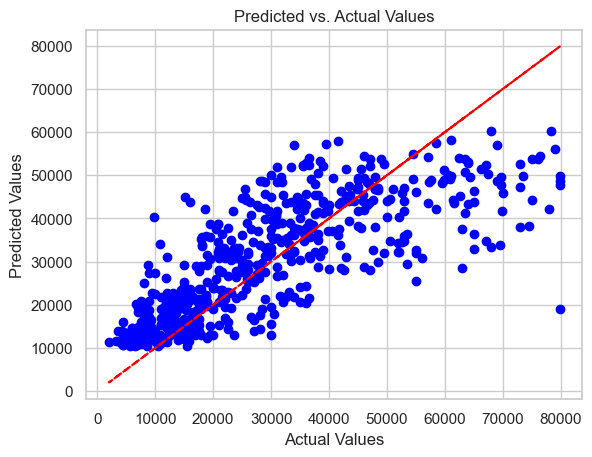

In [90]:
# 2. Predicted vs. Actual Values (evaluates model fit visually)
plt.scatter(y_test, y_pred_rf, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.plot(y_test, y_test, color='red', linestyle='--')  # Perfect prediction line
plt.show()

In [91]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(
    n_estimators=200,     
    learning_rate=0.05,   
    max_depth=5,        
    min_samples_split=10,    
    min_samples_leaf=3,
    subsample=0.8,    
    max_features='sqrt',   
    random_state=42
)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
# Random Forest Regression acuuracy with test size
score = r2_score(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)

print("mean squared error is  : ",mse)
print("r2_score is : ",score)
print("mean_absolute_error is : ",mae)

mean squared error is  :  132507516.51441121
r2_score is :  0.40038264158135584
mean_absolute_error is :  8532.016702488392


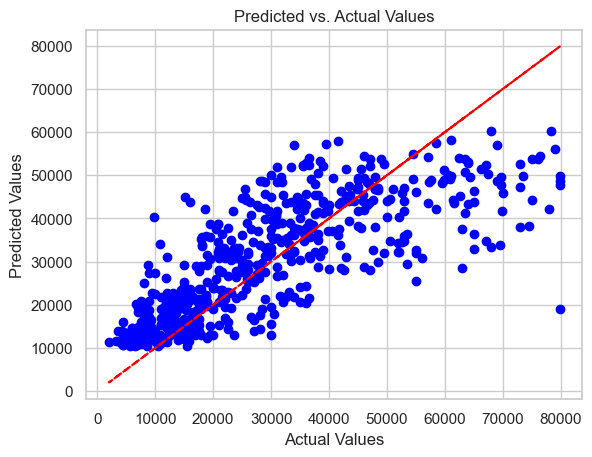

In [92]:
# 2. Predicted vs. Actual Values (evaluates model fit visually)
plt.scatter(y_test, y_pred_rf, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.plot(y_test, y_test, color='red', linestyle='--')  # Perfect prediction line
plt.show()

In [93]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

# Fit the model on training data
model.fit(x_train, y_train)

# Predict on test data
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_pred, y_test)
score = r2_score(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)

# Print the evaluation metrics
print("mean squared error is  : ", mse)
print("r2_score is : ", score)
print("mean_absolute_error is : ", mae)

mean squared error is  :  289252339.4055508
r2_score is :  0.15401025827734183
mean_absolute_error is :  12164.171256454389
